# Employee Attribute Prediction

## Author: Spriha Ghosh

**My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not**

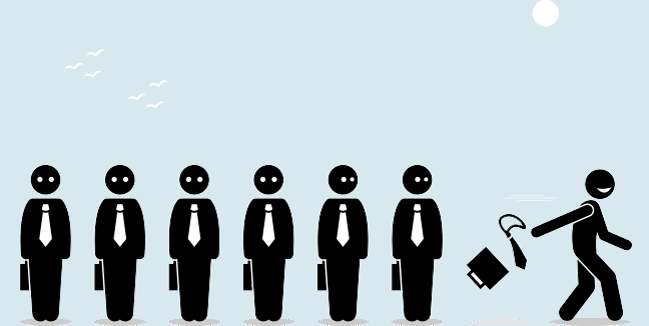

**Obtaining and Scrubbing the Data**

In [1]:
%%capture
!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("employee_data.csv")

In [4]:
# Can you check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

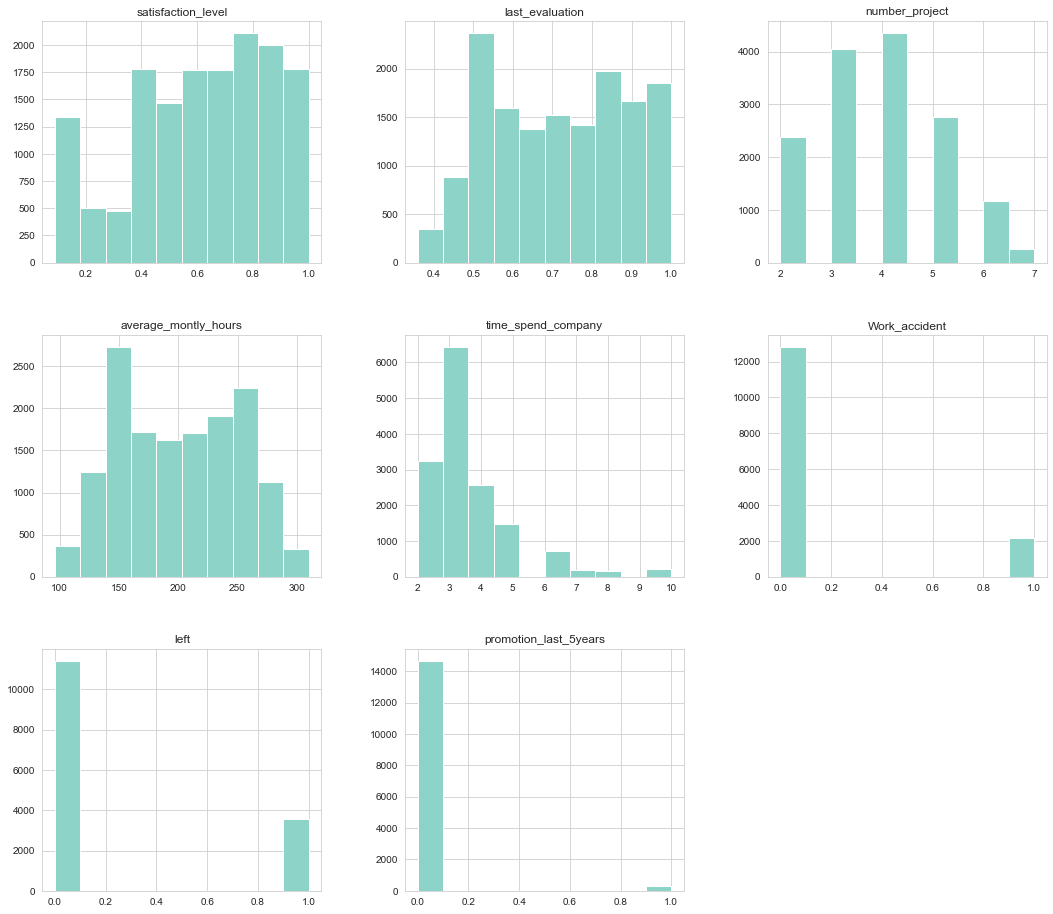

In [5]:
sns.set_style('whitegrid')
sns.set_palette('Set3')
df.hist(figsize=(18,16));

## NOTE: Since Sweetviz is a new Python feature. It is yet to be displayed on a Github upload.

### Download the Notebook and run to generate the report. Meanwhile, I have attached screenshots.

                                             |                                             | [  0%]   00:00 ->…


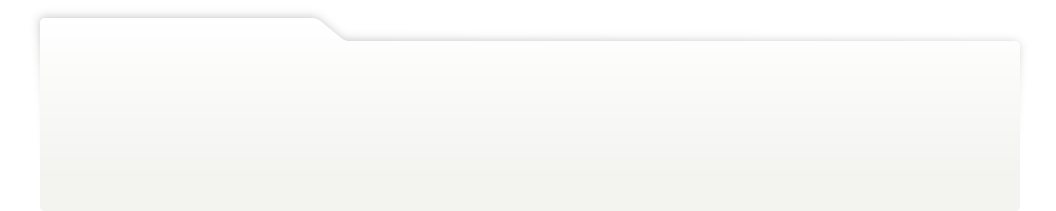
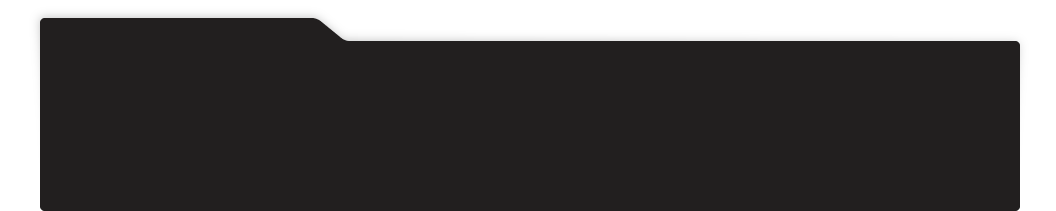
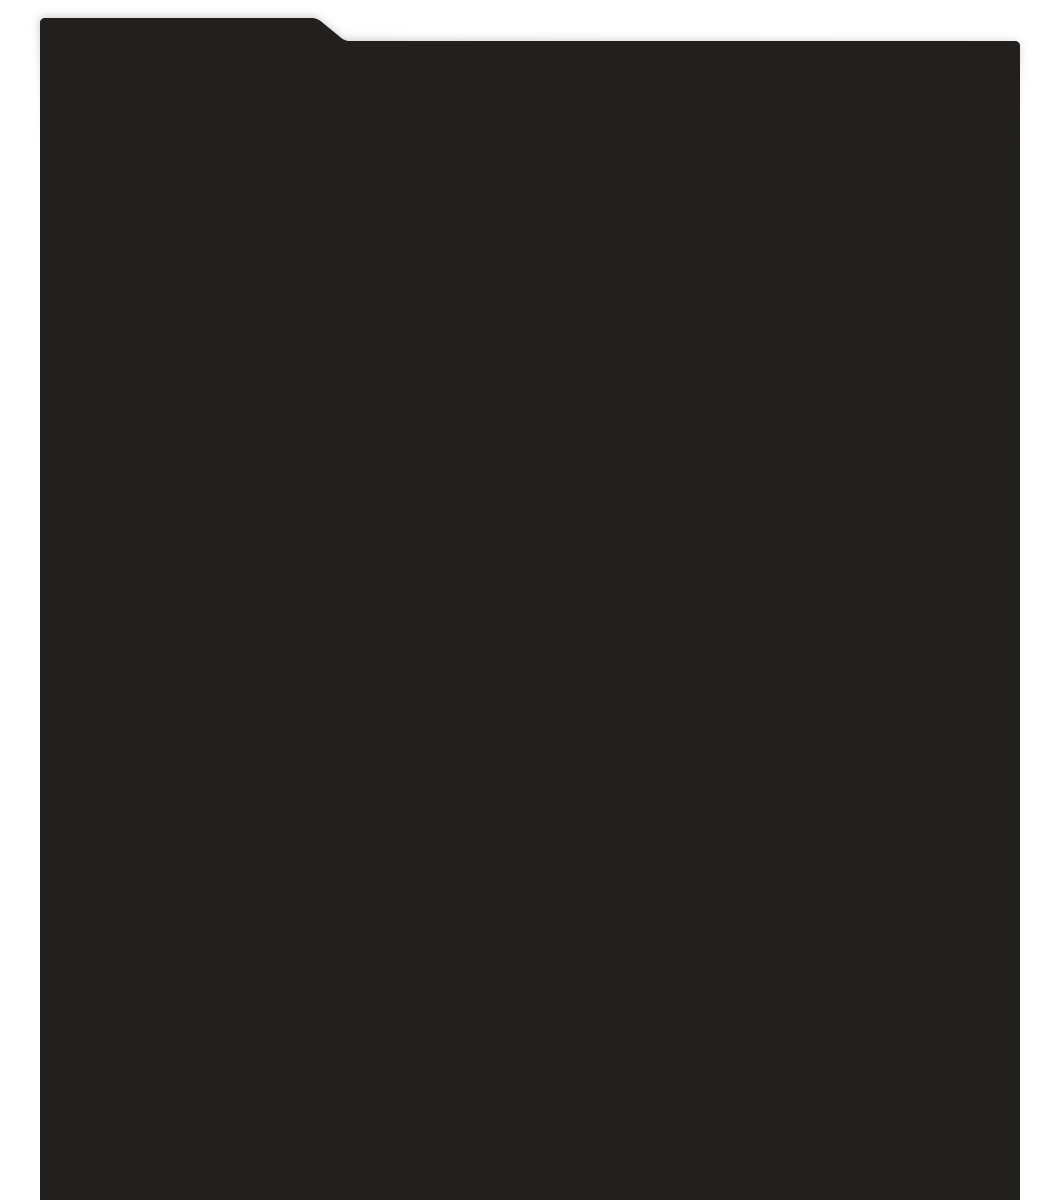
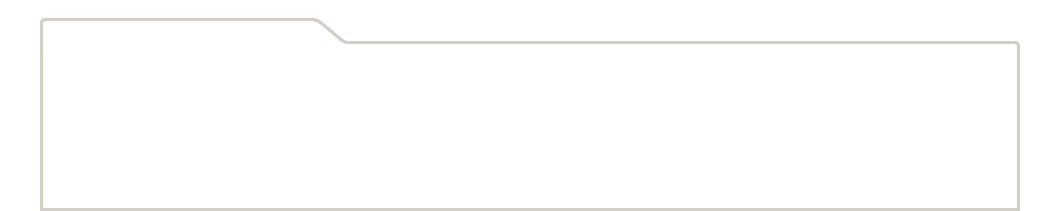
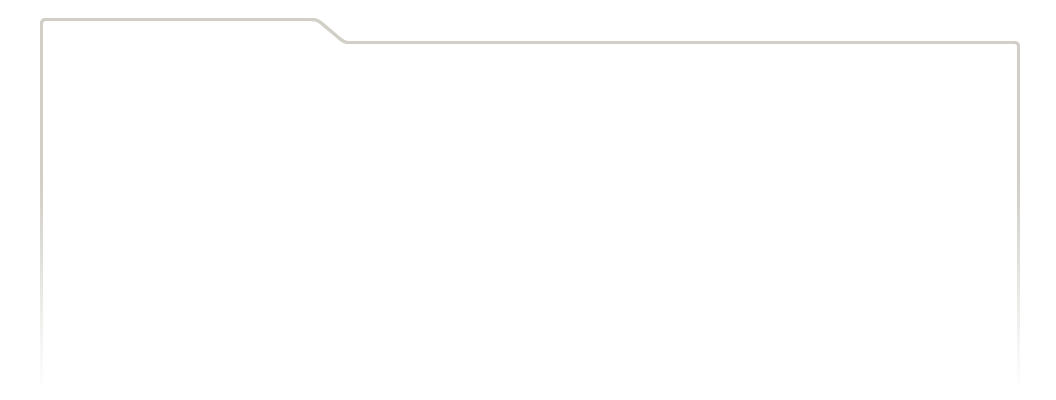
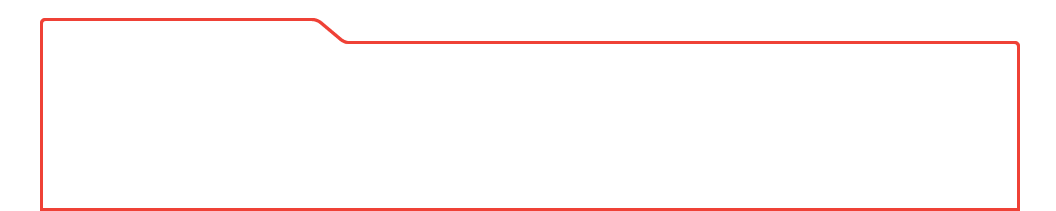
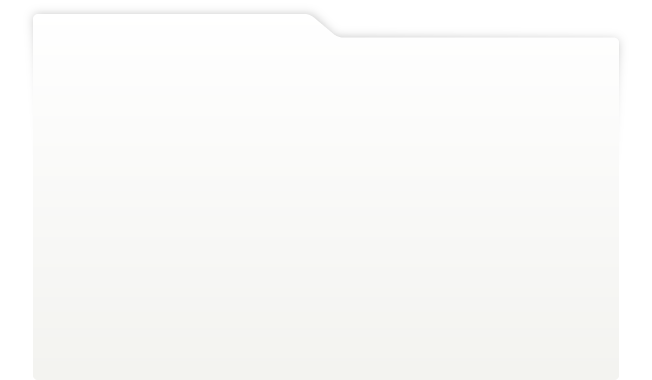
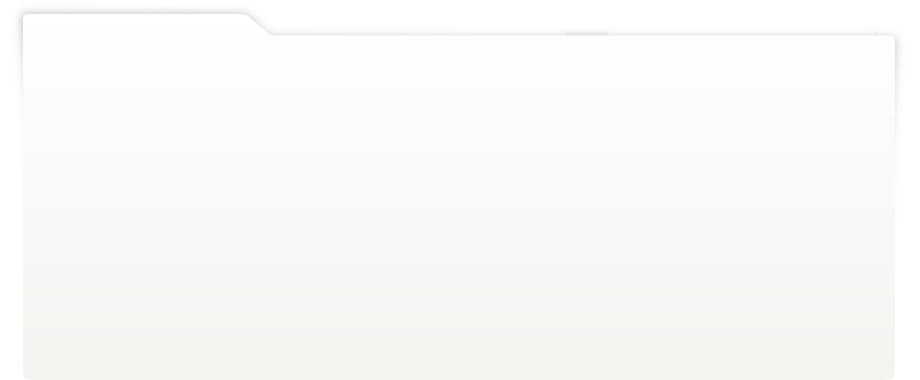
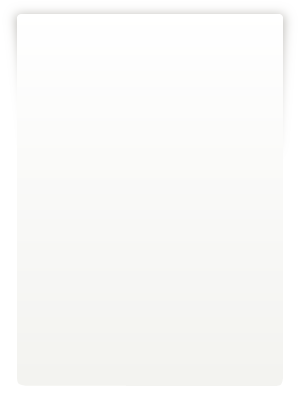
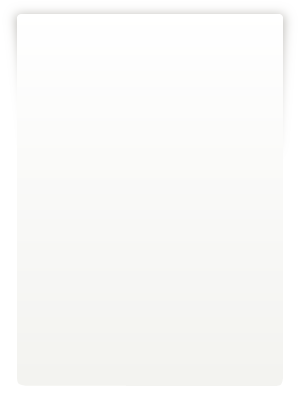
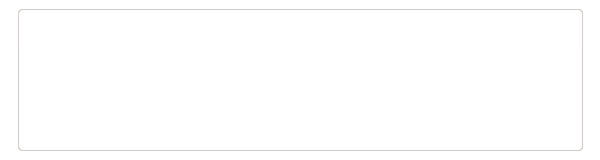
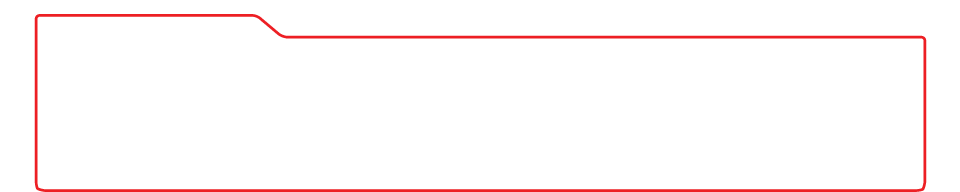
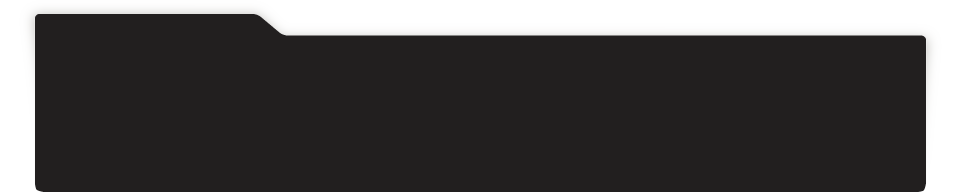
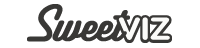
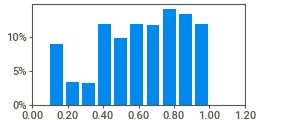
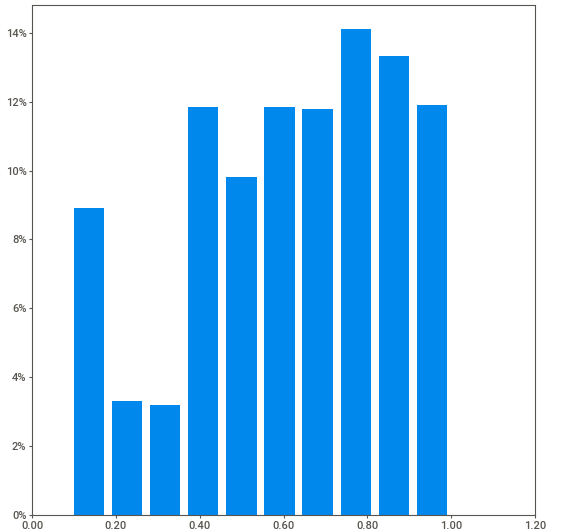
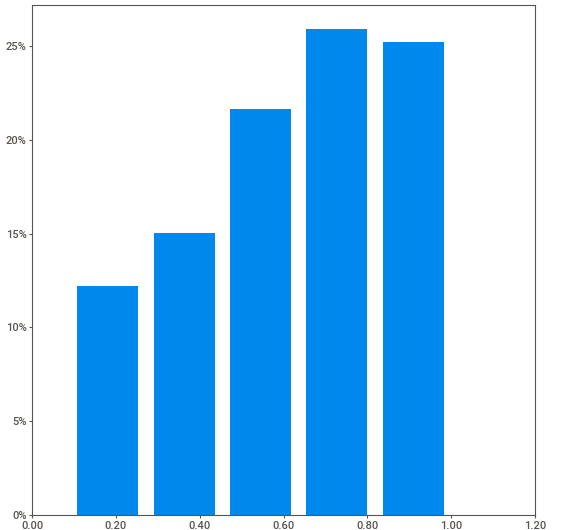
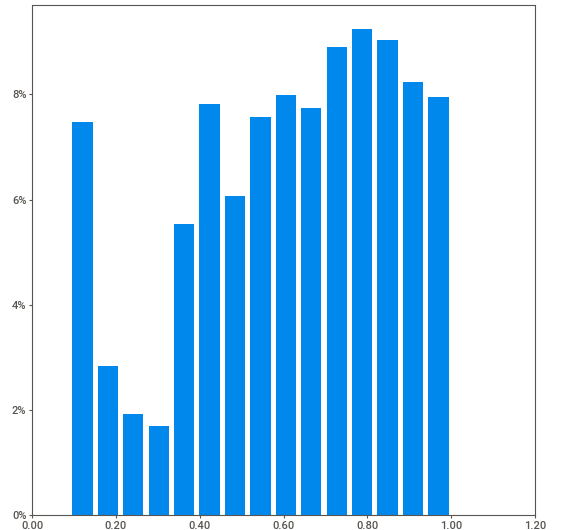
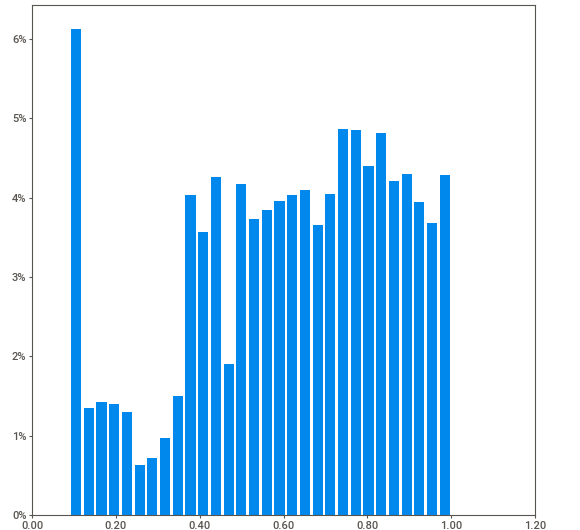
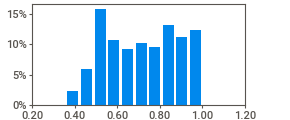
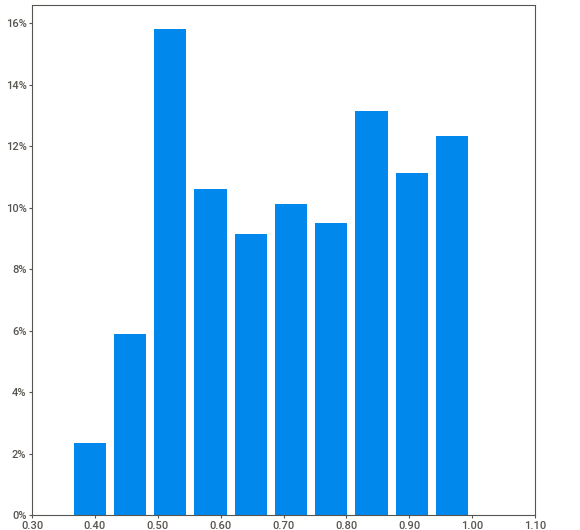
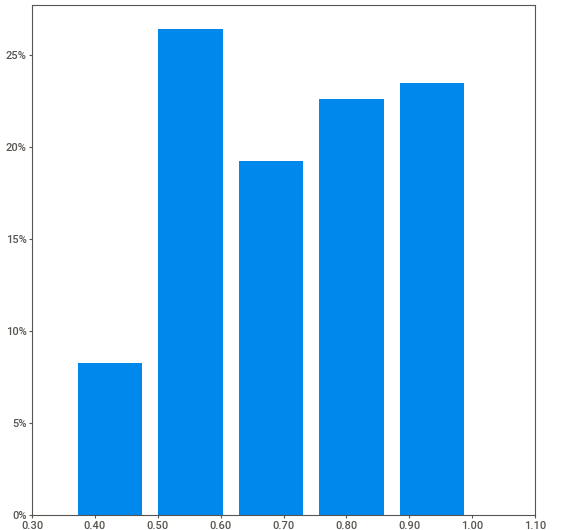
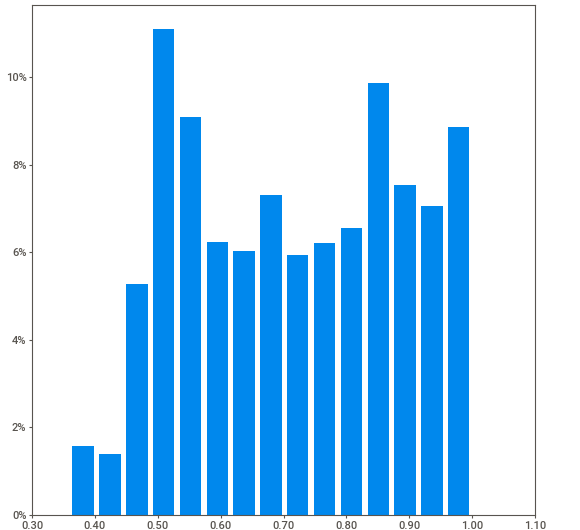
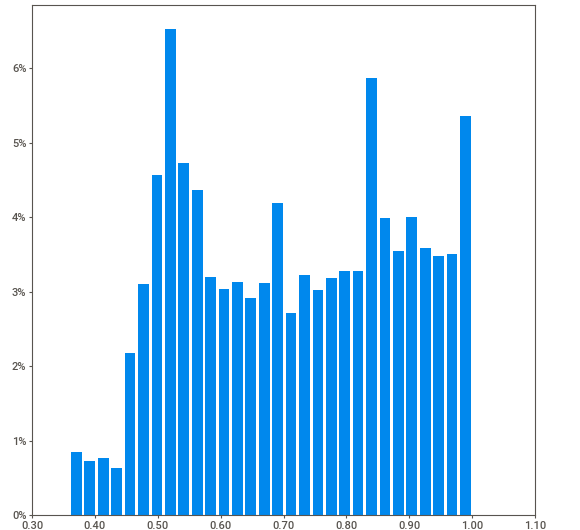
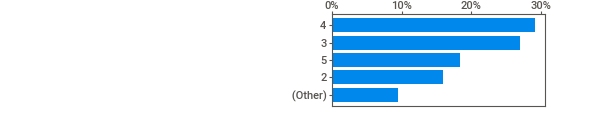
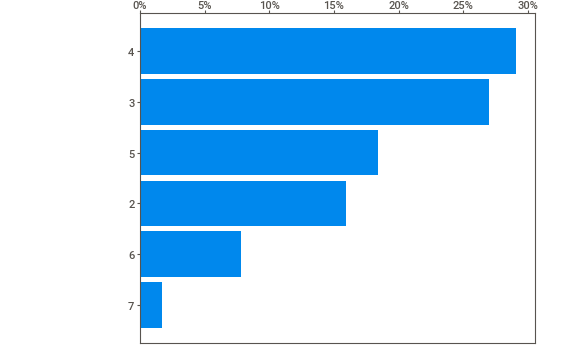
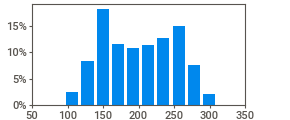
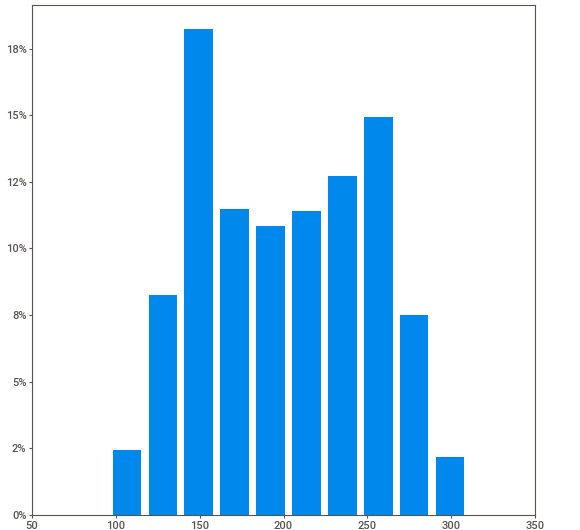
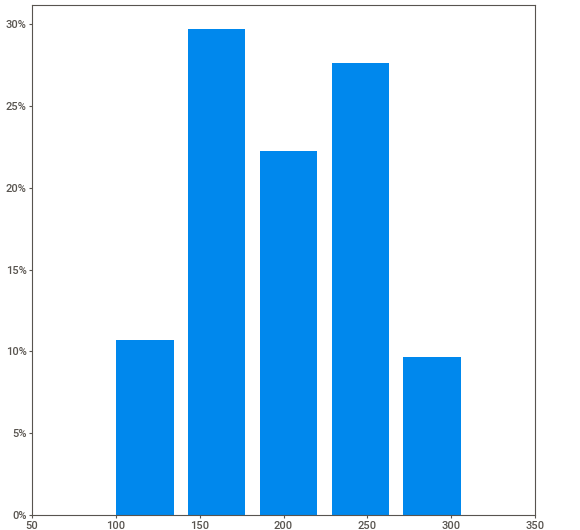
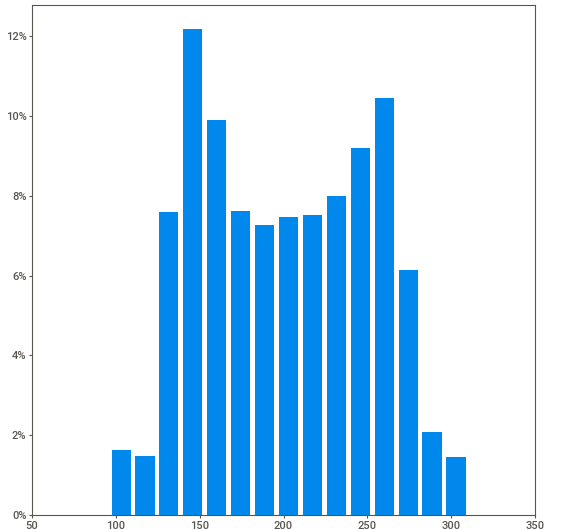
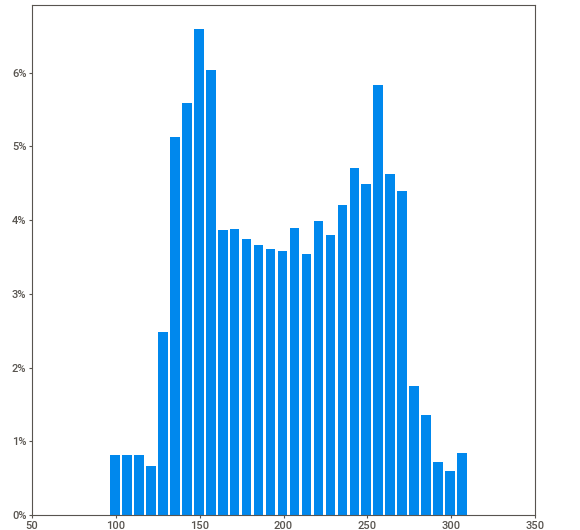
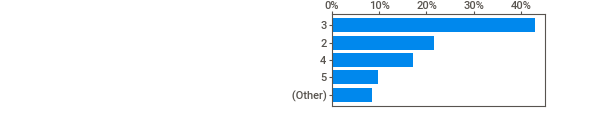
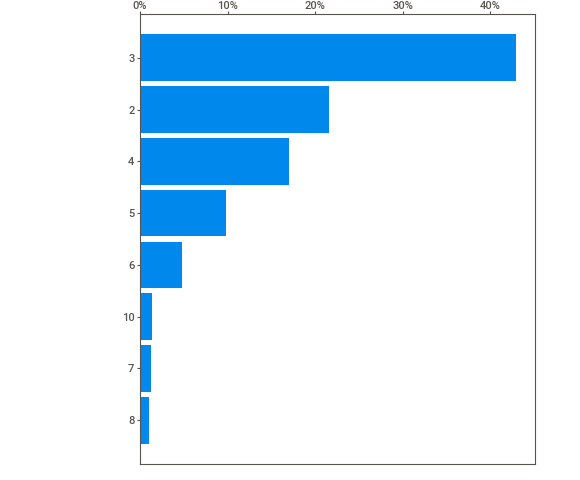
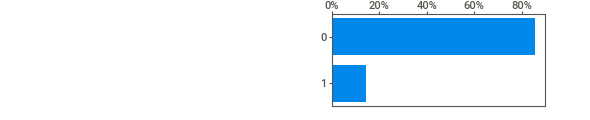
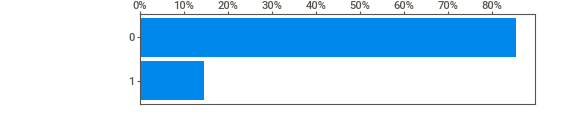
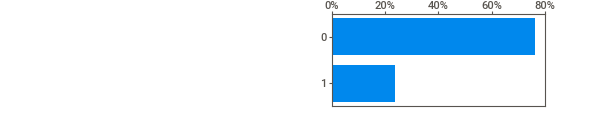
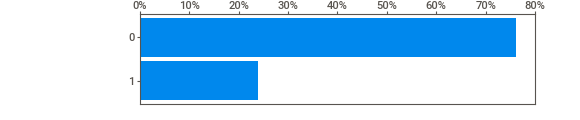
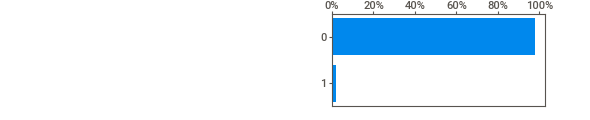
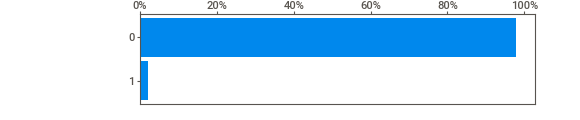
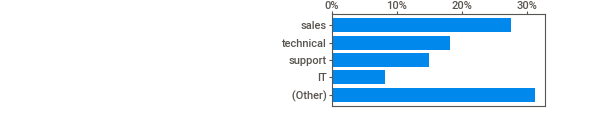
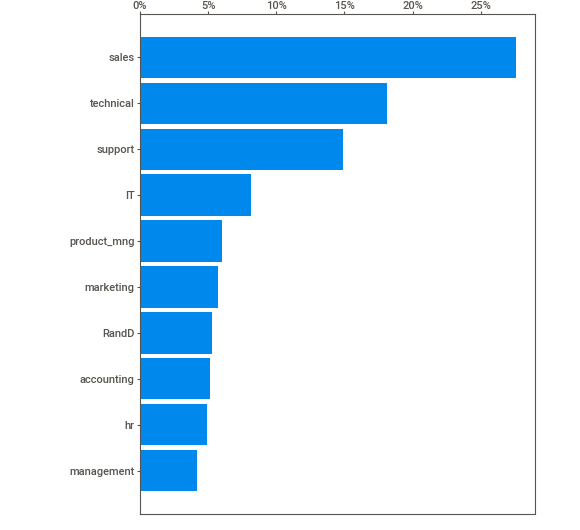
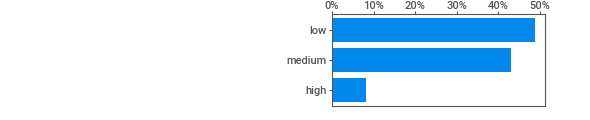
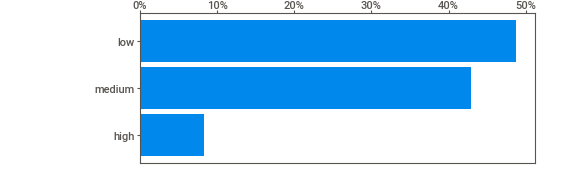
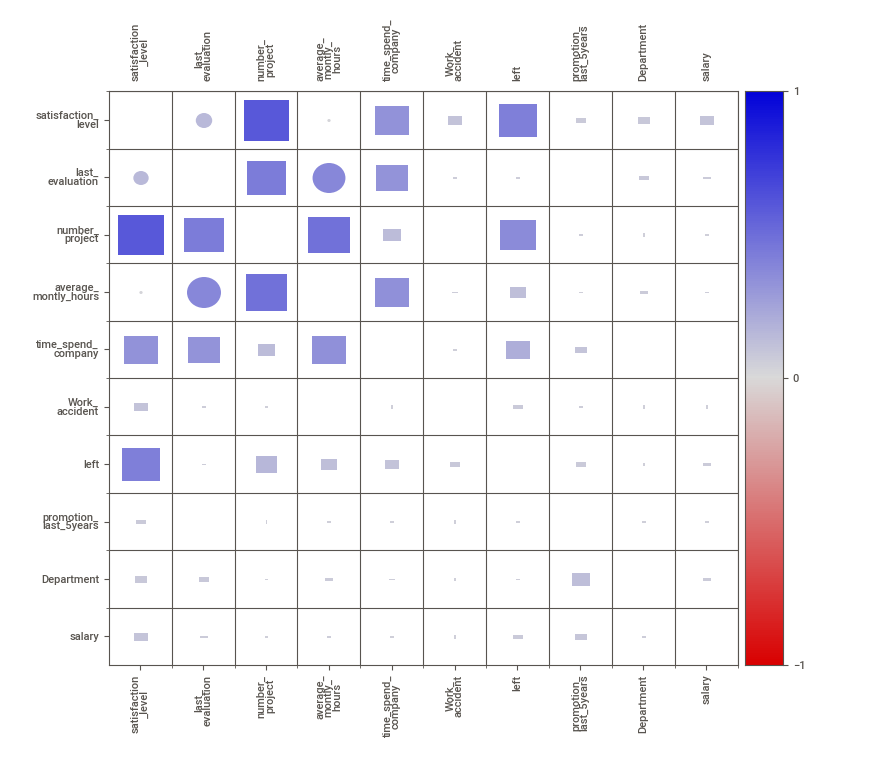
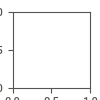

In [6]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_notebook(w="100%", h="full") # if working in Kaggle

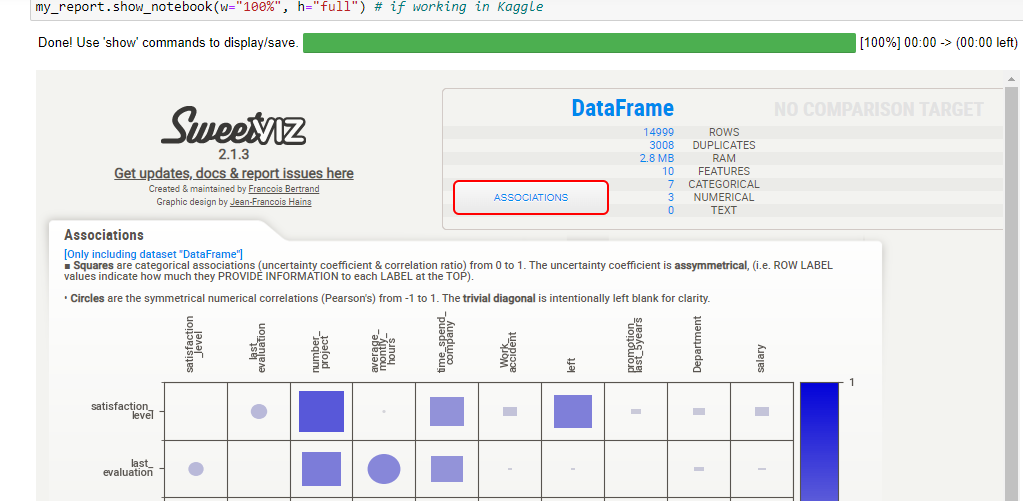


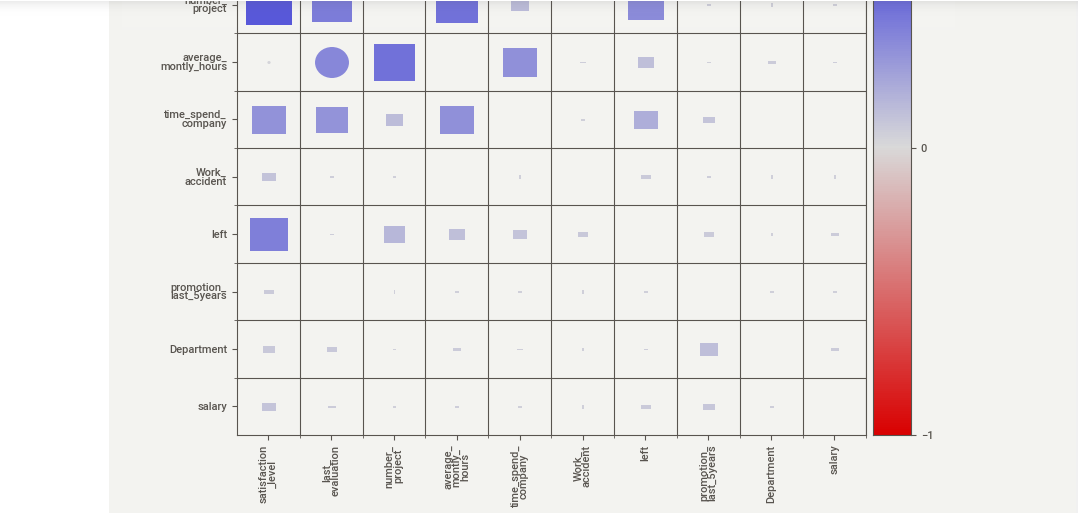

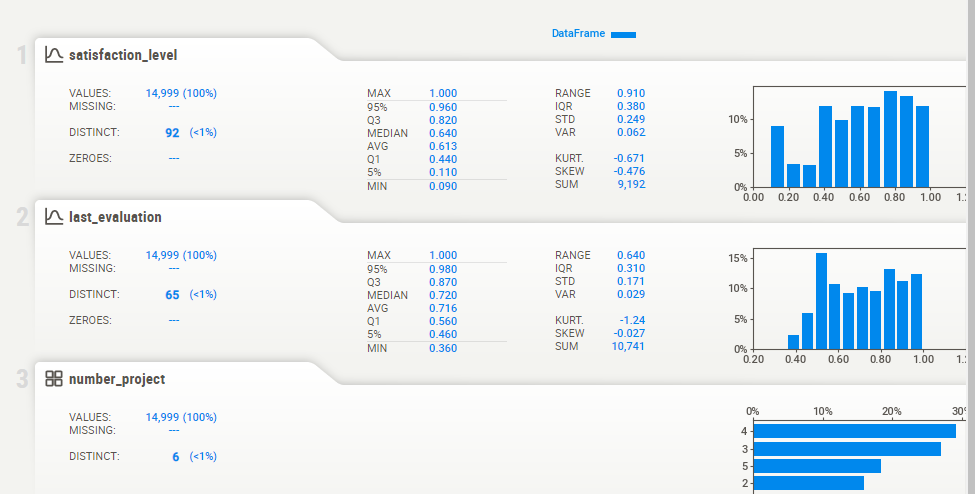

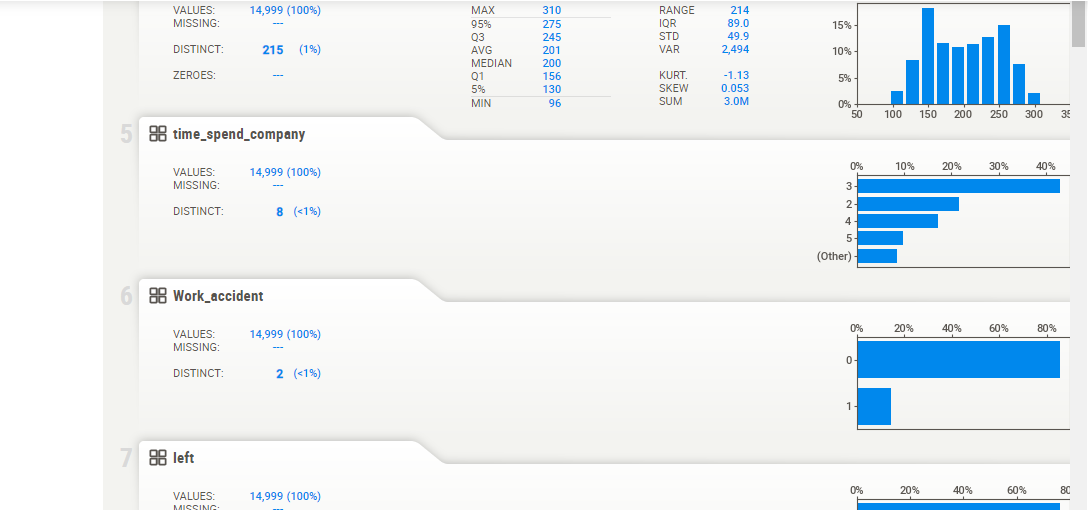

In [66]:
# Display the statistical overview of the employees
round(df.describe(), 2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.02,0.08,0.43,0.08,0.05,0.05,0.05,0.04,0.06,0.06,0.15,0.18
std,0.25,0.17,1.23,49.94,1.46,0.35,0.14,0.28,0.50,0.27,0.22,0.22,0.22,0.20,0.23,0.24,0.36,0.39
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [96]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,high,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,True,0,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,True,0,0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,True,0,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,True,0,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,True,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.029708,0.031367,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.020628,0.006191,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.008726,0.007377,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.007101,0.005007,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.039953,0.018299,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009040,0.001856,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,0.012079,-0.006070
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.076756,0.040985,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,-0.035605,-0.035799
high,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,0.076756,1.000000,-0.260274,-0.016089,-0.015115,0.011821,-0.017858,0.209077,0.009642,-0.006514,-0.029184,-0.014672
medium,0.031367,0.006191,0.007377,0.005007,0.018299,0.001856,0.040985,-0.260274,1.000000,0.003775,0.020402,0.003285,0.025765,-0.030716,0.004213,-0.002632,-0.006035,-0.007673
IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.016089,0.003775,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.124705,-0.140484


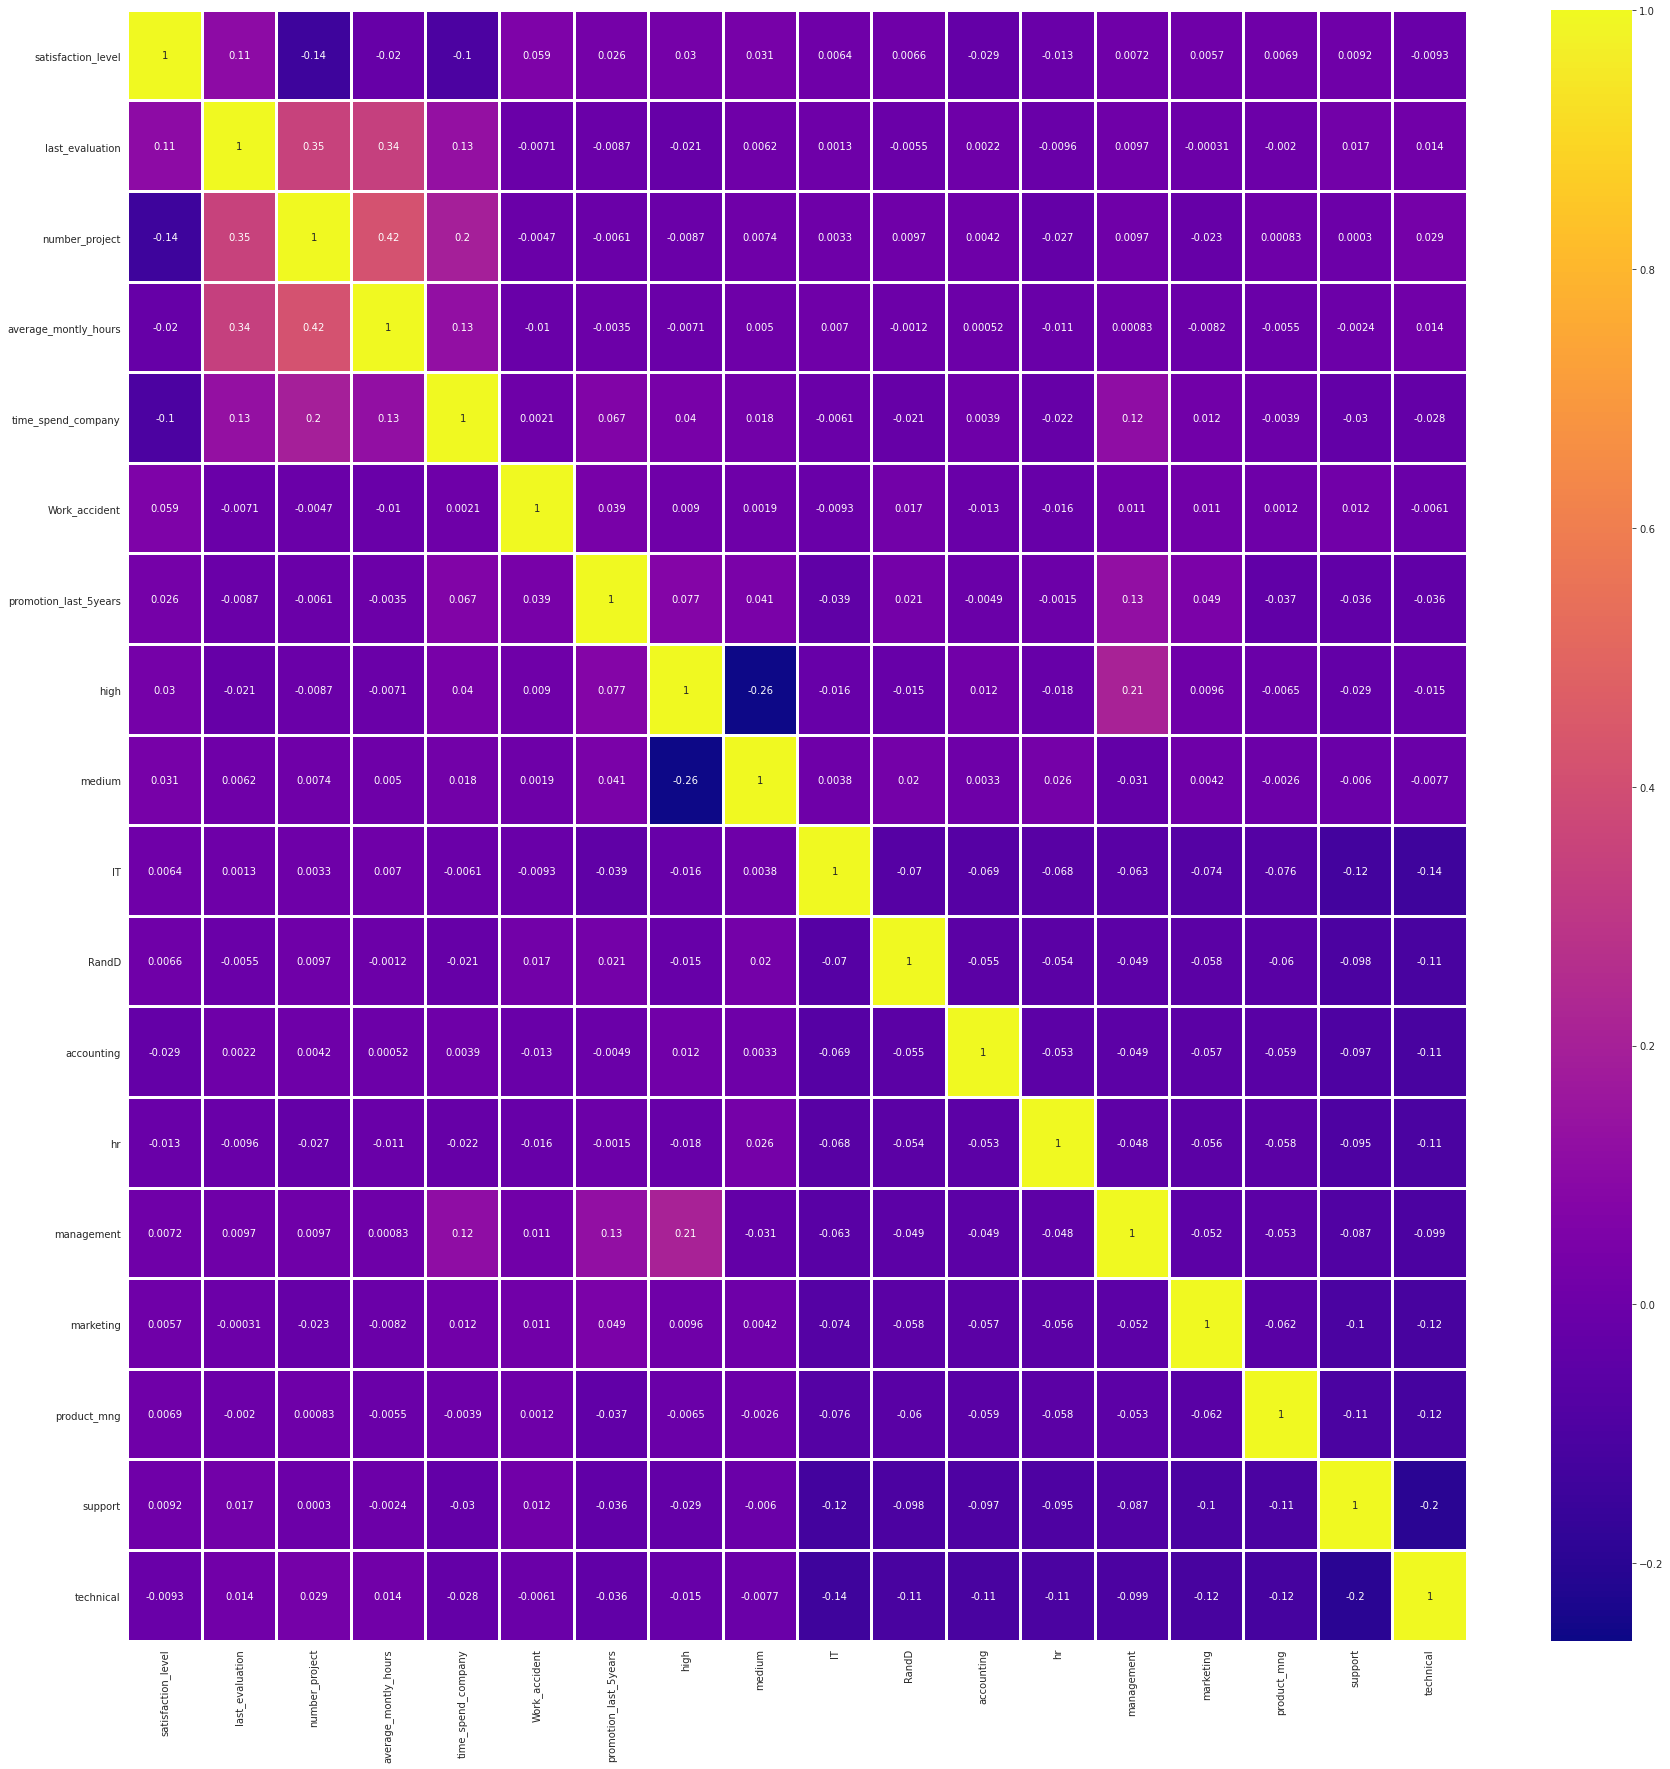

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
sns.heatmap(df.corr(), linewidths = 2, cmap="plasma", annot=True)

**Turnover V.S. Evaluation**

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

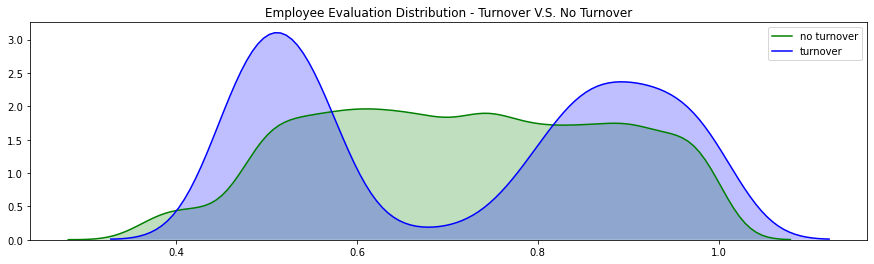

In [23]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df[''] == 0),''] , color='green',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'last_evaluation'] , color='blue',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')


There is a biomodal distribution for those that had a turnover. Employees with low performance tend to leave the company more. Employees with high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation

**Turnover V.S. AverageMonthlyHours**

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

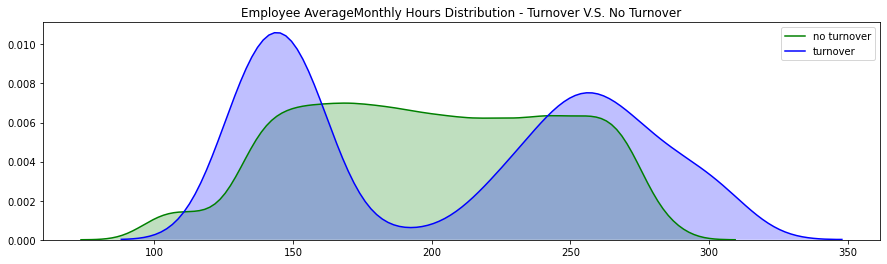

In [24]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'average_montly_hours'] , color='green',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'average_montly_hours'] , color='blue',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Another bi-modal distribution for employees that turnovered. Employees who had less hours of work ( ~150 hours or less) left the company more. Employees who had too many hours of work ( ~250 or more) left the company. Employees who left generally were underworked or overworked.

**Turnover V.S. Satisfaction**

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

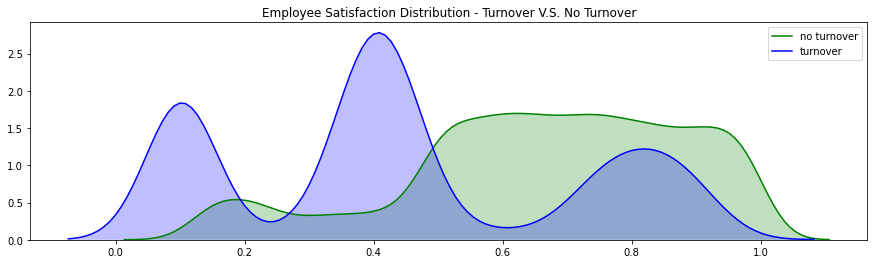

In [25]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction_level'] , color='green',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction_level'] , color='blue',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

There is a tri-modal distribution for employees that turnovered. Employees who had really low satisfaction levels (0.2 or less) left the company more. Employees who had low satisfaction levels (0.3~0.5) left the company more. Employees who had really high satisfaction levels (0.7 or more) left the company more

In [27]:
df.turnover = df.turnover.map({
    0:'False',  #True (1) or False (0) in boolean logic. 
    1:'True' })
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,True,0,sales,low
1,0.80,0.86,5,262,6,0,True,0,sales,medium
2,0.11,0.88,7,272,4,0,True,0,sales,medium
3,0.72,0.87,5,223,5,0,True,0,sales,low
4,0.37,0.52,2,159,3,0,True,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,True,0,support,low
14995,0.37,0.48,2,160,3,0,True,0,support,low
14996,0.37,0.53,2,143,3,0,True,0,support,low
14997,0.11,0.96,6,280,4,0,True,0,support,low


**One Hote Encoding**

In [28]:
dummies1 = pd.get_dummies(df.salary)
dummies1 = dummies1.drop('low', axis=1)
dummies1

,high,medium
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
14994,0,0
14995,0,0
14996,0,0
14997,0,0


In [29]:
df.drop('salary',axis=1,inplace=True)

In [30]:
dummies2 = pd.get_dummies(df.Department)
dummies2 = dummies2.drop('sales', axis=1)
dummies2

,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [31]:
df.drop('Department',axis=1,inplace=True)

In [32]:
df = pd.concat([df,dummies1], axis='columns') 
df = pd.concat([df,dummies2], axis='columns') 
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,high,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,True,0,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,True,0,0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,True,0,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,True,0,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,True,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,True,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,True,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,True,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,True,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
X = df.drop('turnover', axis=1).values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [36]:
y = df.turnover
y

0        True
1        True
2        True
3        True
4        True
         ... 
14994    True
14995    True
14996    True
14997    True
14998    True
Name: turnover, Length: 14999, dtype: object

In [37]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.25295305,
         2.39353848, -0.4706553 ]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()  
dtc = dtc.fit(X_train,y_train)
dtc

DecisionTreeClassifier()

In [42]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, dtc.predict(X_test)))

Decision Tree's Accuracy:  0.976


In [43]:
print("DT:", classification_report(y_test,  dtc.predict(X_test)))

DT:               precision    recall  f1-score   support

       False       0.98      0.98      0.98      2266
        True       0.95      0.95      0.95       734

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train.ravel())

y_gb=gb_clf.predict(X_test)

              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2266
        True       0.93      0.90      0.91       734

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



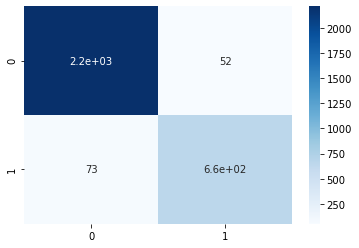

In [45]:
gb_matrix=confusion_matrix(y_test, y_gb)
sns.heatmap(gb_matrix, annot=True, cmap='Blues')
print(classification_report(y_test, y_gb))

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train, y_train)

In [47]:
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, forest.predict(X_test)))

Random Forest Accuracy:  0.9733333333333334


In [48]:
print("Random Forest:", classification_report(y_test,  forest.predict(X_test)))

Random Forest:               precision    recall  f1-score   support

       False       0.97      1.00      0.98      2266
        True       0.99      0.90      0.94       734

    accuracy                           0.97      3000
   macro avg       0.98      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [51]:
forest.estimators_

[DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1791095845),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=2135392491),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=946286476),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1857819720),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=491263),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=550290313),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1298508491),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=2143362693),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=630311759),
 DecisionTreeClassifier(max_depth=10, max_features

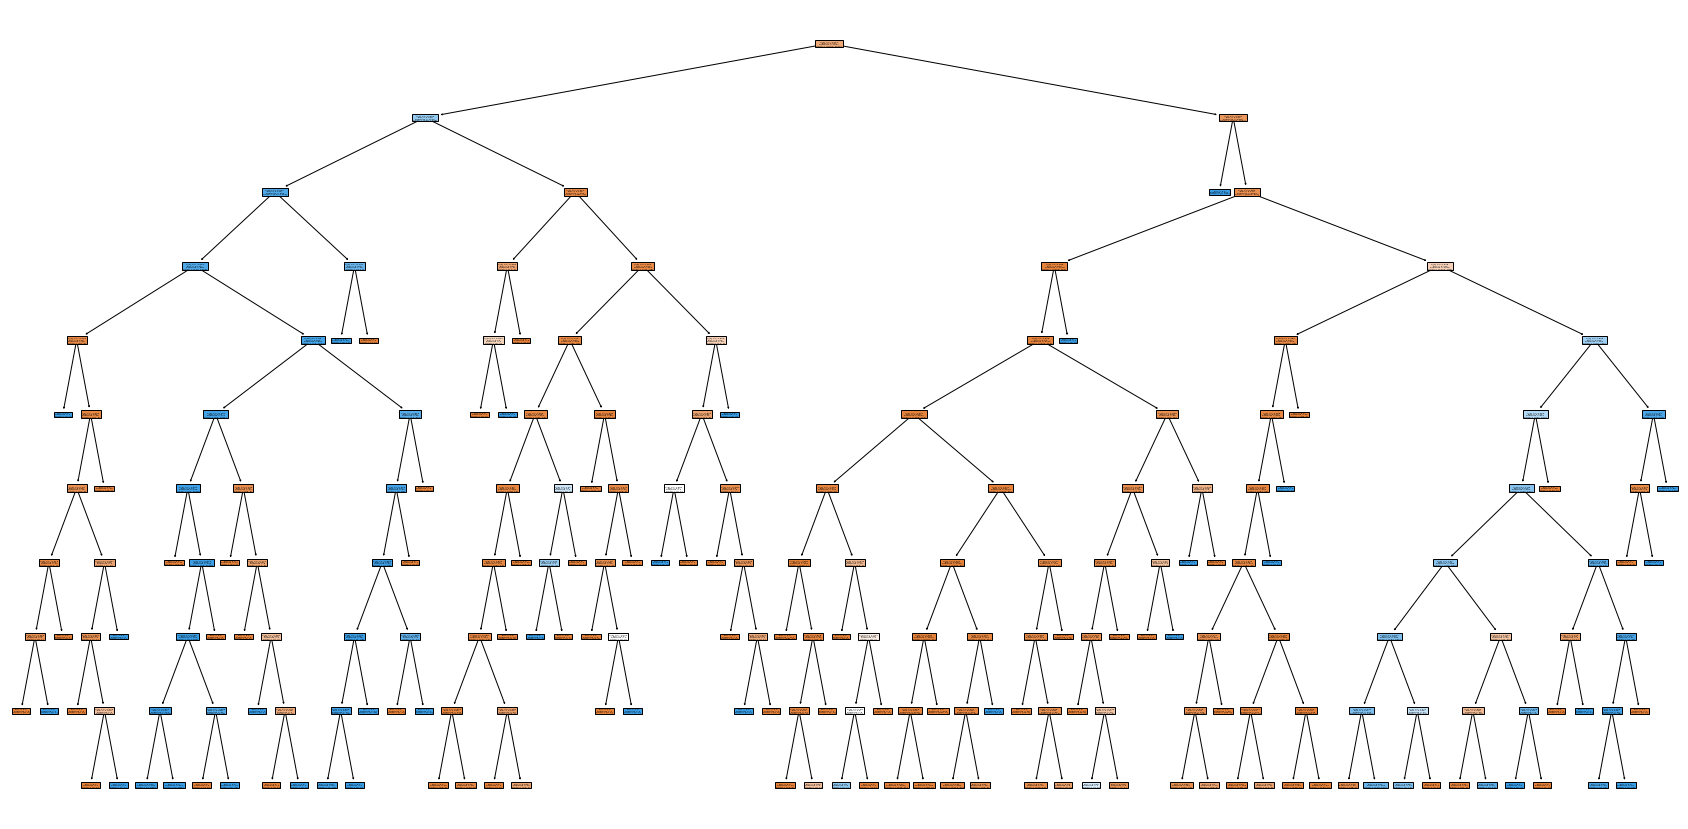

In [53]:
from sklearn import tree
plt.figure(figsize=(30,15))
for i in range(1):
    tree.plot_tree(forest.estimators_[i],filled=True)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [58]:
print("Ada Boost Accuracy: ", metrics.accuracy_score(y_test, ada.predict(X_test)))

Ada Boost Accuracy:  0.9516666666666667


In [60]:
print("AdaBoost:", classification_report(y_test,  ada.predict(X_test)))

AdaBoost:               precision    recall  f1-score   support

       False       0.96      0.97      0.97      2266
        True       0.92      0.88      0.90       734

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000

